In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt, numpy as np, pandas as pd

loading dataset

In [2]:
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

Elbow method

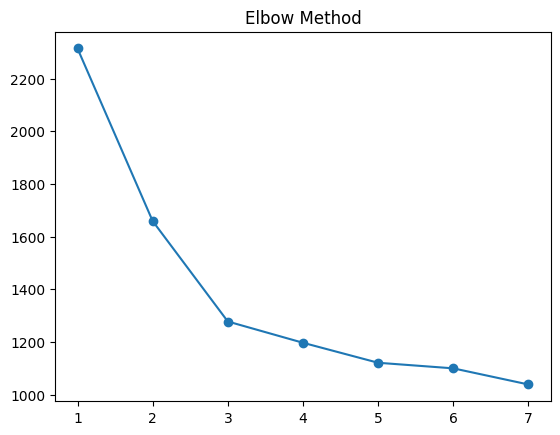

In [3]:
inertia = [KMeans(n_clusters=k, random_state=0).fit(X).inertia_ for k in range(1,8)]
plt.plot(range(1,8), inertia, marker='o'); plt.title("Elbow Method"); plt.show()

Kmeans clustering

KMeans silhouette: 0.285


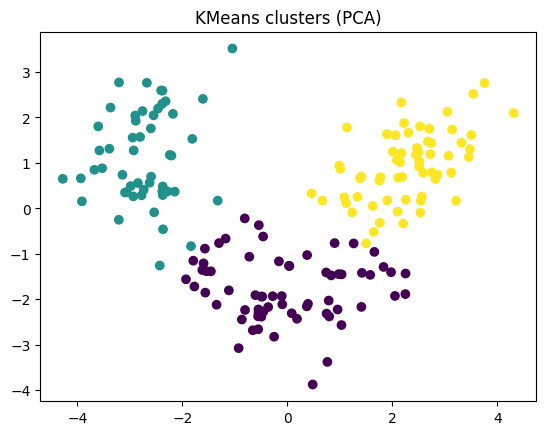

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print("KMeans silhouette:", round(silhouette_score(X, kmeans.labels_),3))
pca = PCA(2).fit_transform(X)
plt.scatter(pca[:,0], pca[:,1], c=kmeans.labels_); plt.title("KMeans clusters (PCA)"); plt.show()

Ensemble the cluster

Ensemble silhouette: 0.285


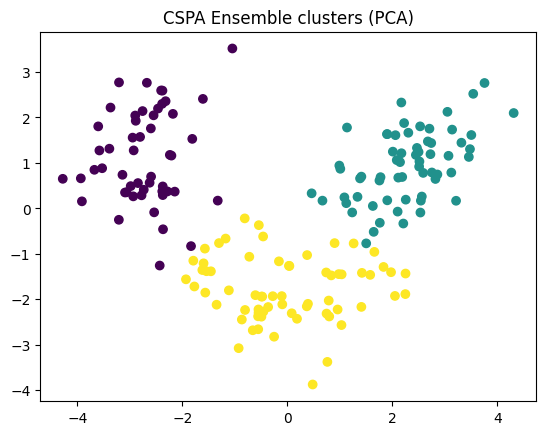

In [6]:
base = [KMeans(n_clusters=k, random_state=42).fit_predict(X) for k in [3,4,5]]
n = len(base[0]); sim = np.zeros((n,n))
for c in base:
   sim += (c[:,None] == c[None,:])
sim /= len(base)
labels = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42).fit_predict(sim)
print("Ensemble silhouette:", round(silhouette_score(X, labels),3))
plt.scatter(pca[:,0], pca[:,1], c=labels); plt.title("CSPA Ensemble clusters (PCA)"); plt.show()